# Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning 
models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot 
afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank 
is responsible for the fraud transactions.
The dataset contains transactions made over a period of two days in September 2013 by 
European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) 
account for 0.172% of all transactions. We need to take care of the data imbalance while 
building the model and come up with the best model by trying various algorithms.

# Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach 
each of the steps.
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [1]:
# importing basic libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Reading dataset
df= pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# checking null values
df.isnull().count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [11]:
# Checking the distribution of the class
classes= df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

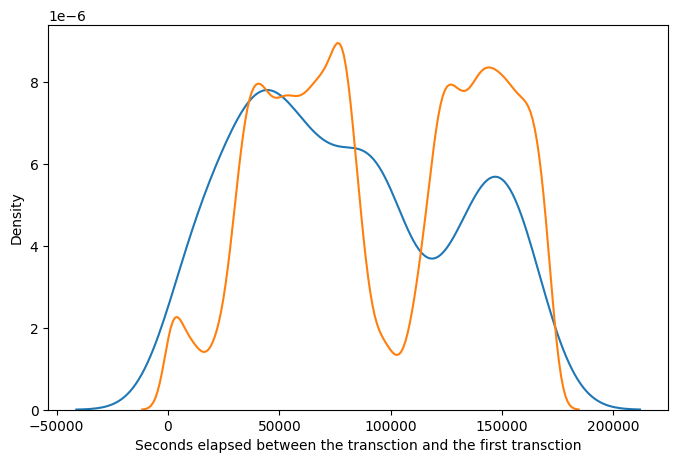

In [14]:
#Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [15]:
#We do not see any specific pattern for the fraudulent and non-fraudulent transctions with 
#respect to Time. Hence, we can drop the Time column.
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

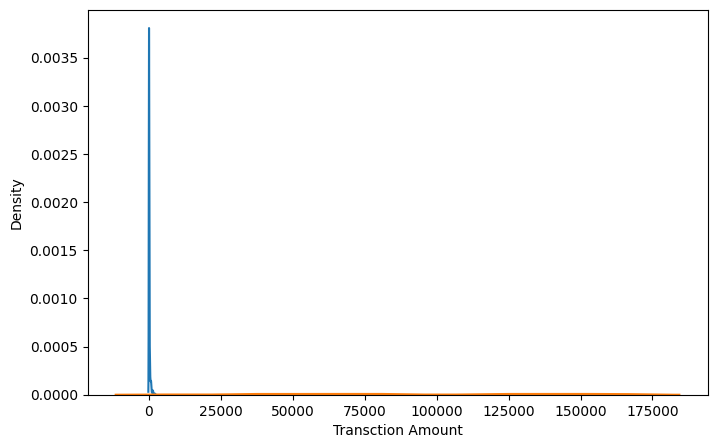

In [18]:
#Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

## Train Test Split

In [21]:
from sklearn.model_selection import  train_test_split
X=df.drop(['Class'],axis=1)
Y=df['Class']
X_train,X_test,y_train,y_test= train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=100)

In [23]:
# we need to scale Amount col
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()

X_train['Amount']=scaler.fit_transform(X_train[['Amount']])


In [27]:
X_test['Amount']=scaler.transform(X_test[['Amount']])

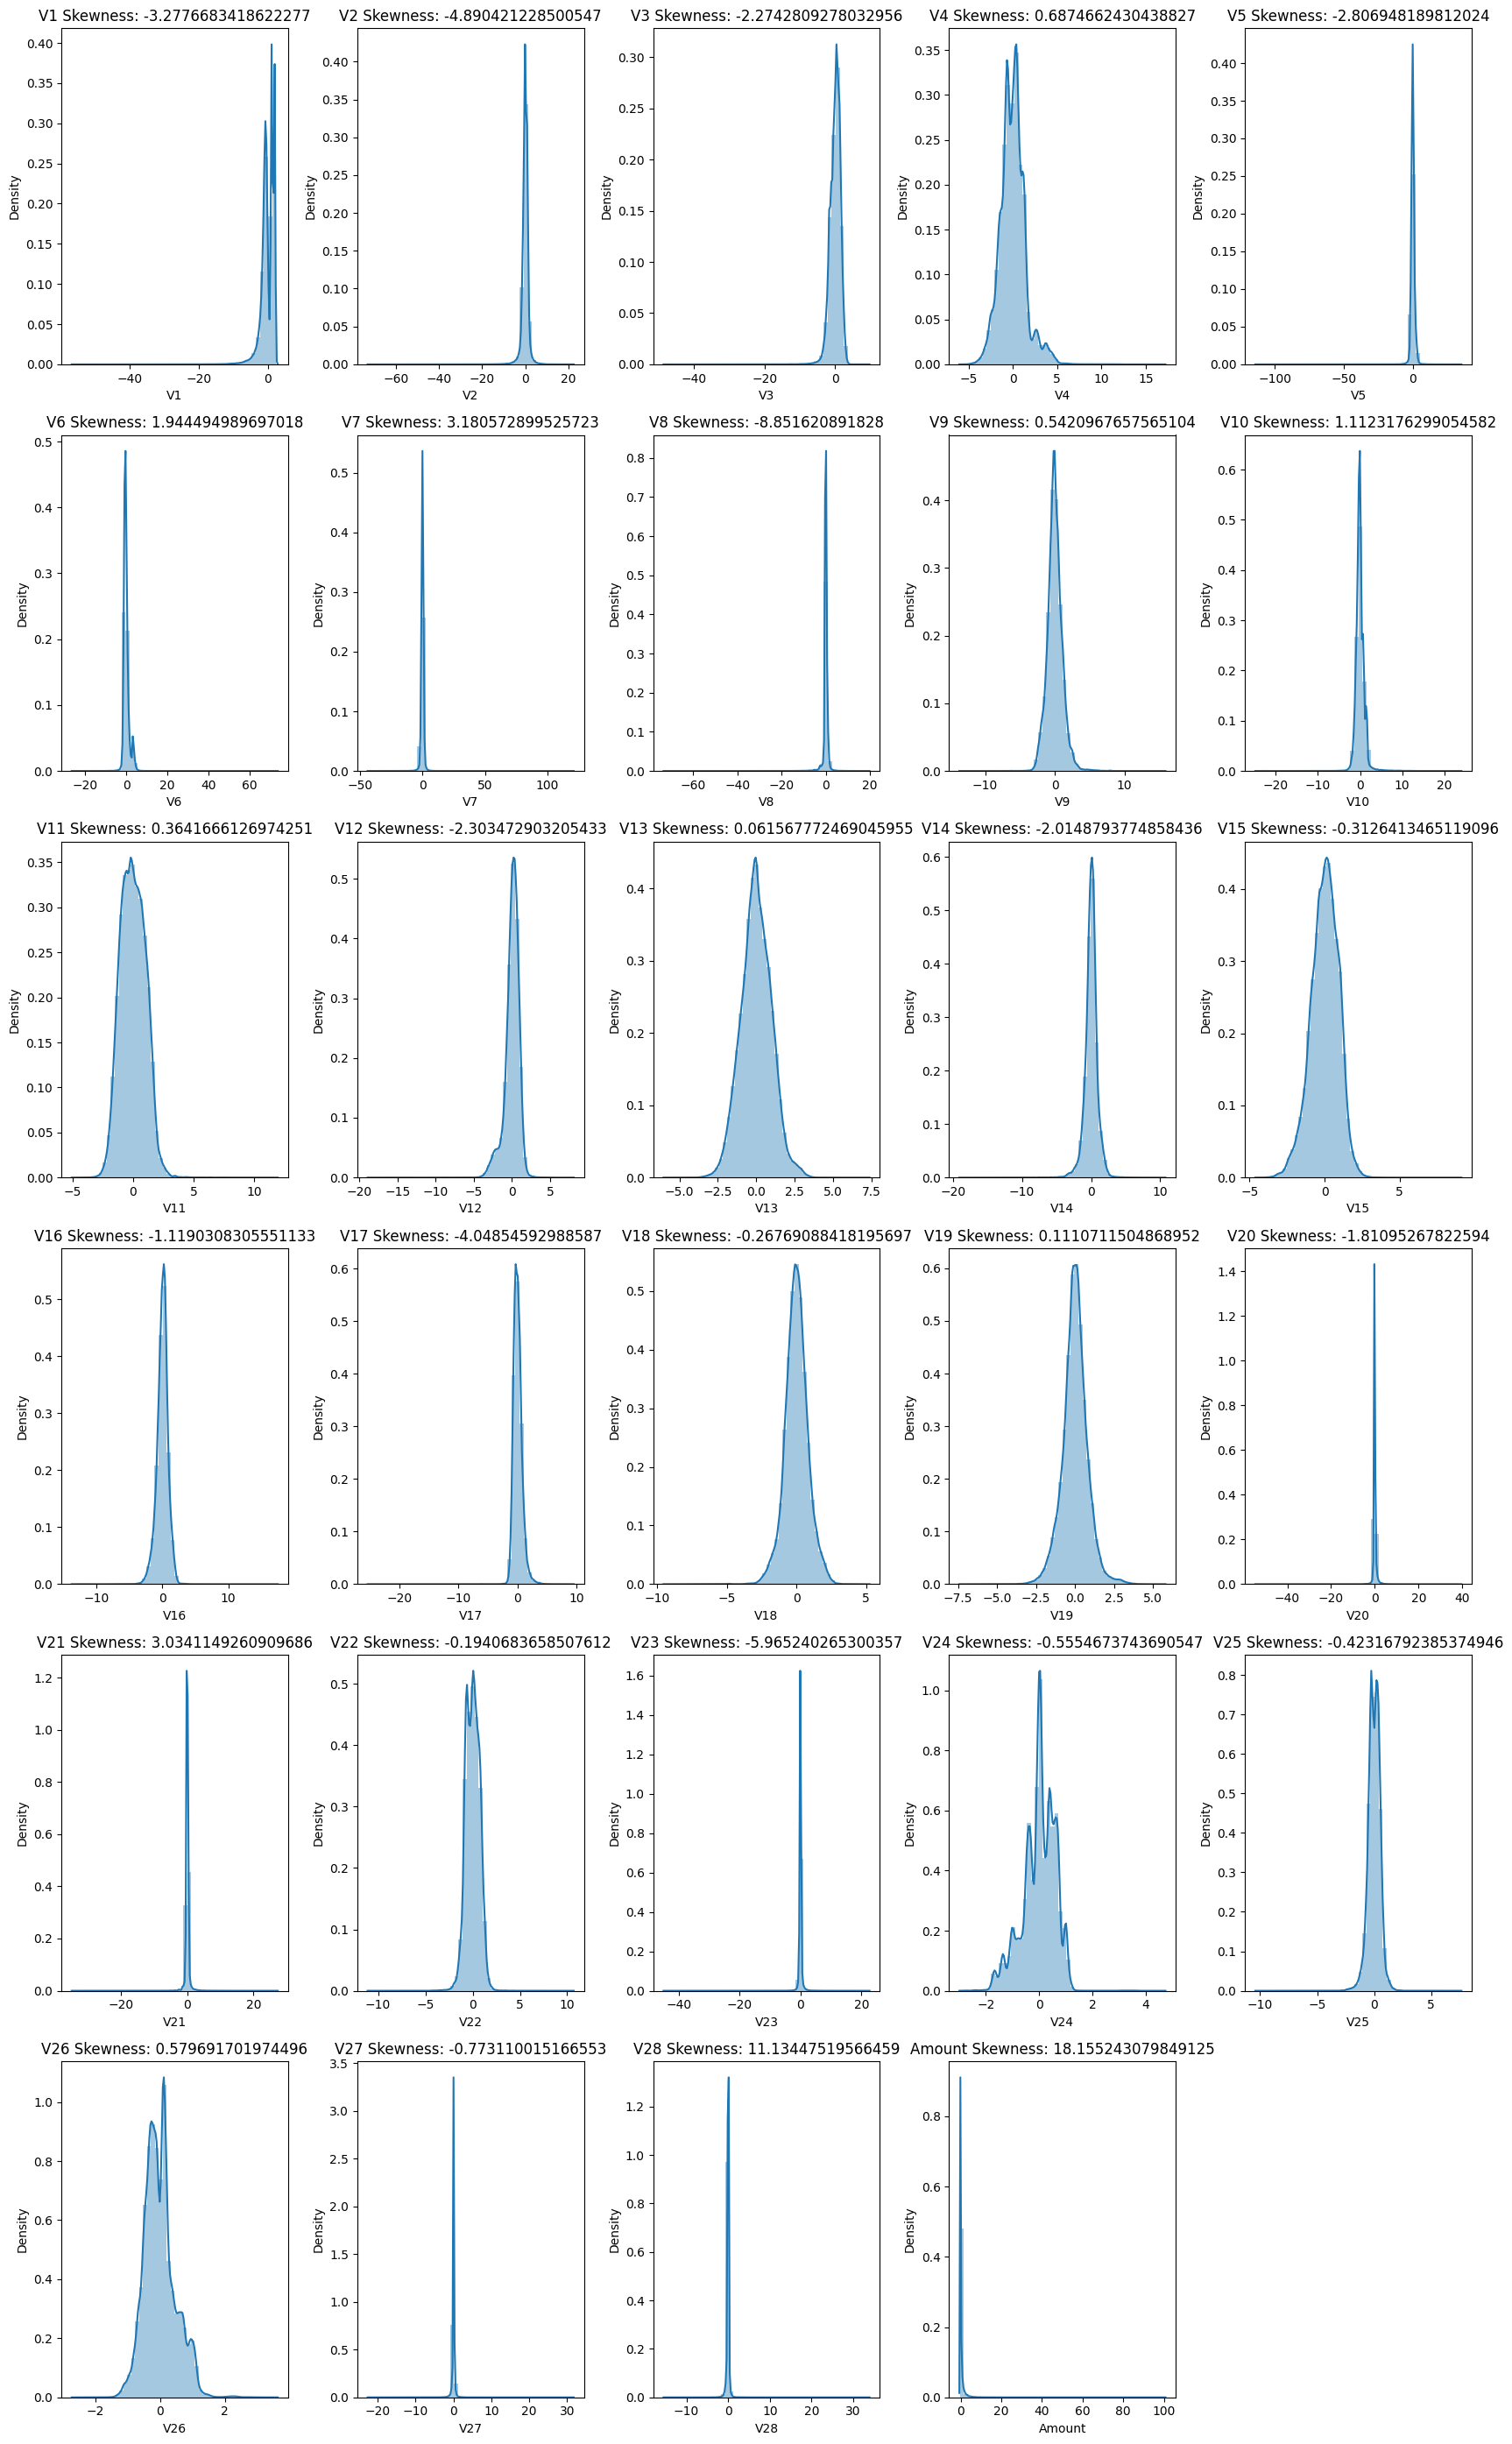

In [32]:
# Plotting the distribution of the variables (skewness) of all the columns
cols = X_train.columns
k = 0
plt.figure(figsize=(17, 28))
for col in cols:
 k = k + 1
 plt.subplot(6, 5, k)
 sns.distplot(X_train[col])
 plt.title(col + ' Skewness: ' + str(X_train[col].skew()))
plt.tight_layout()
plt.show()

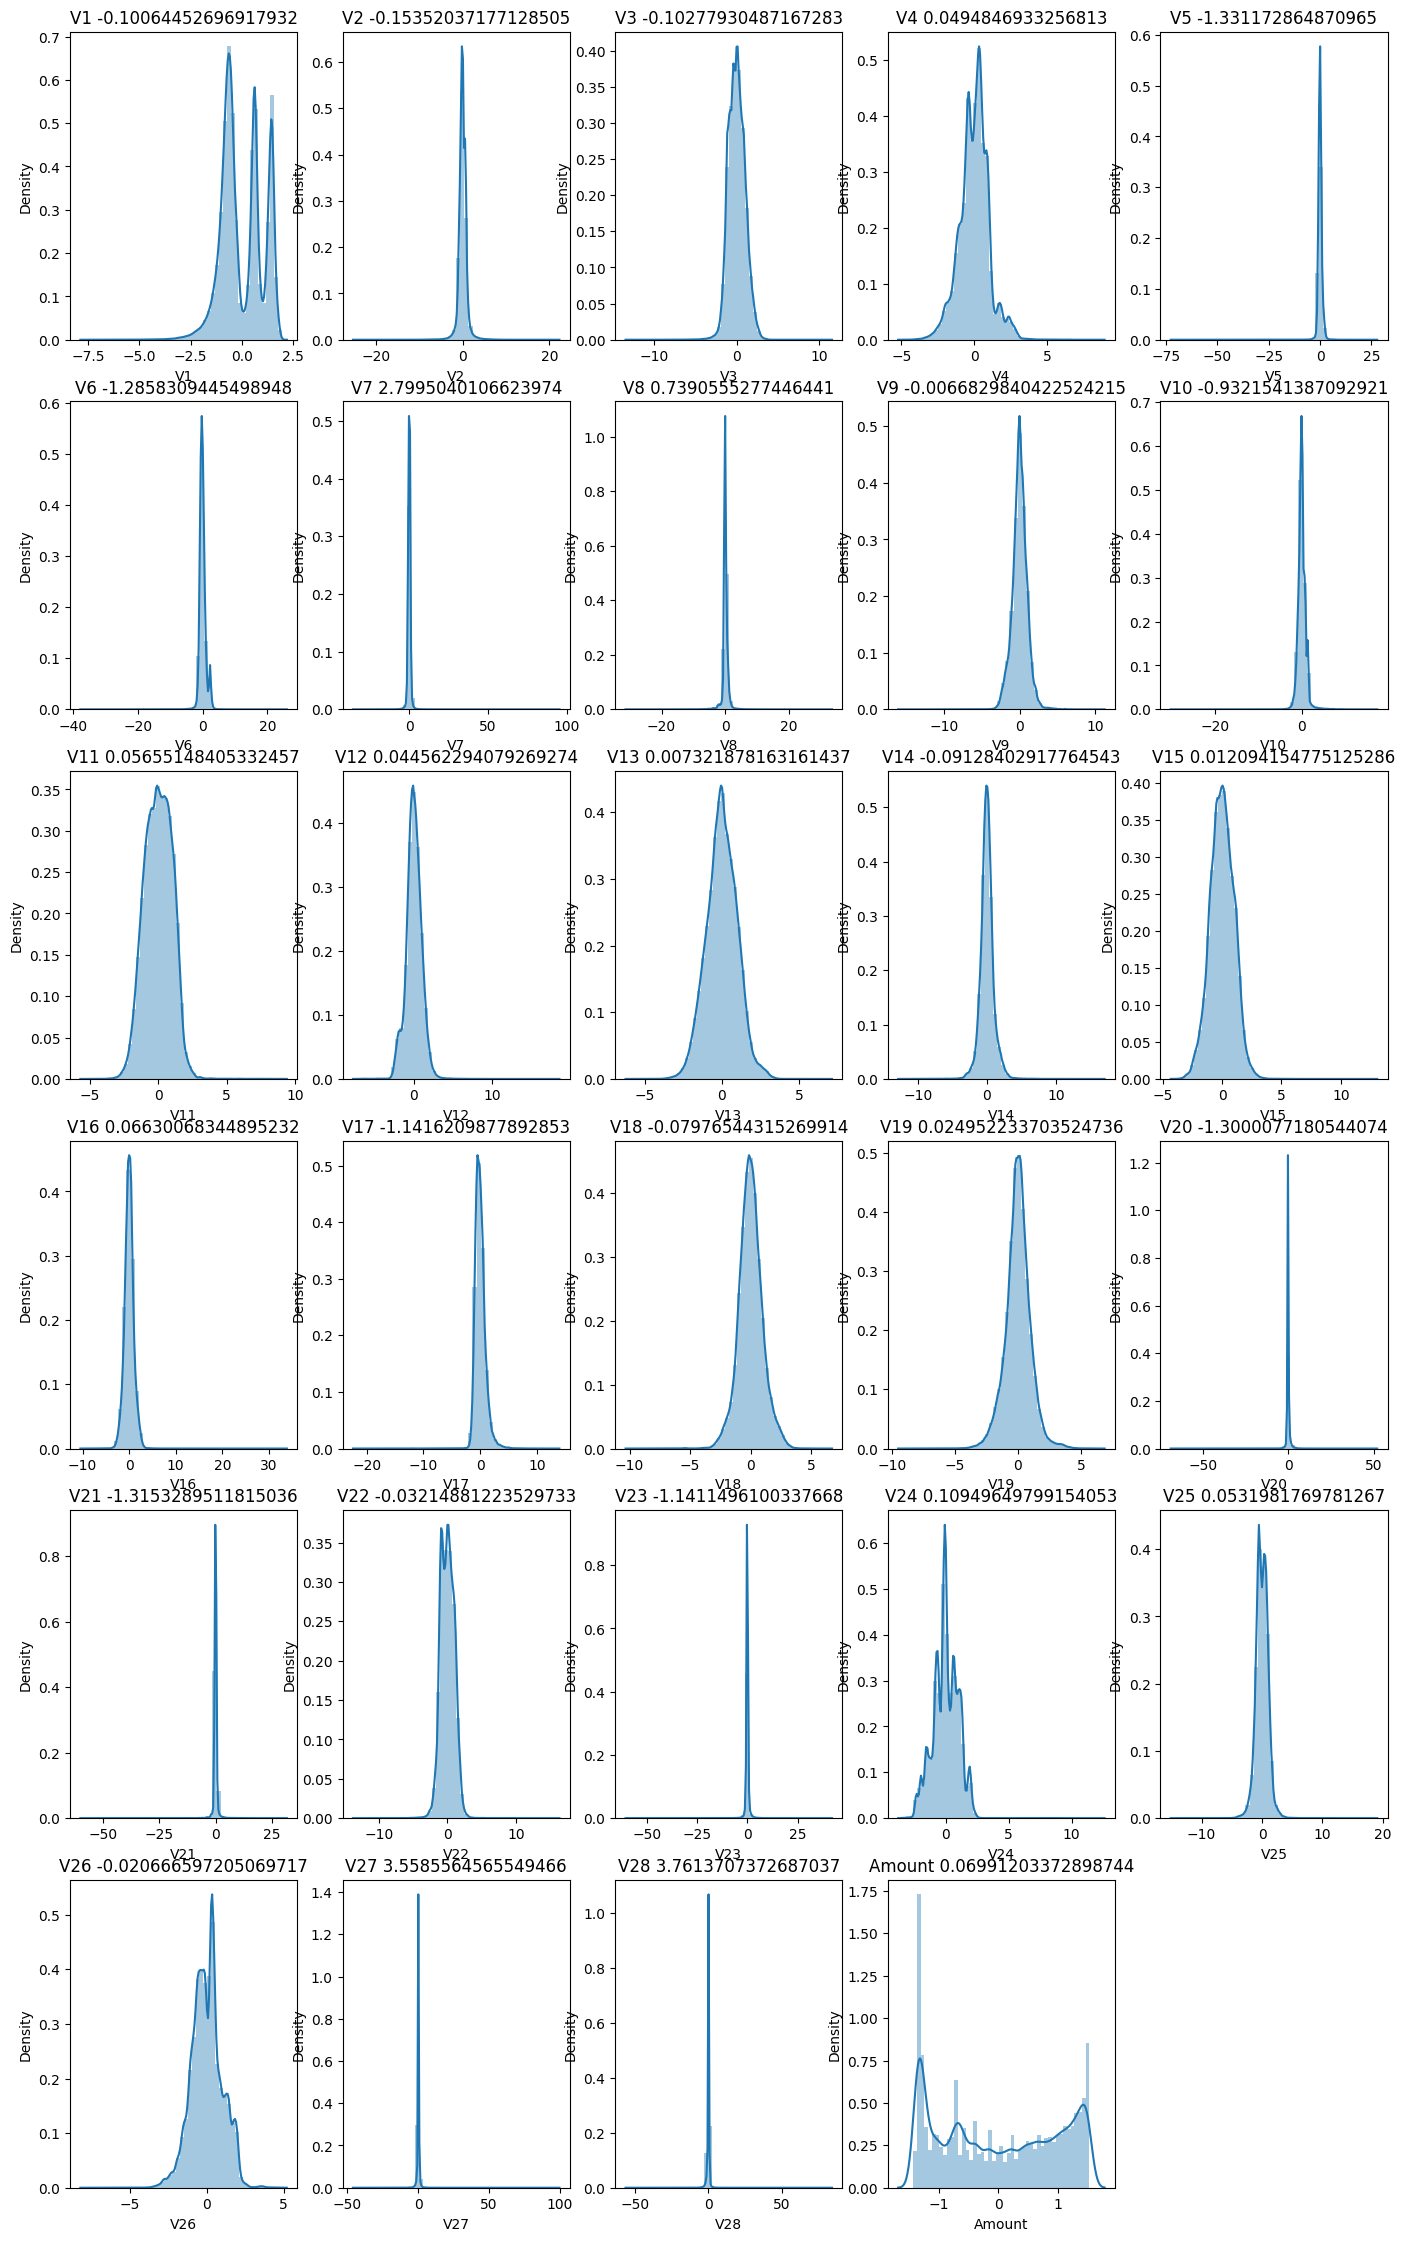

In [35]:
#Mitigate skweness with PowerTransformer
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True,copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)
# Transform the test set
X_test[cols] = pt.transform(X_test)
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols : 
 k=k+1
 plt.subplot(6, 5,k) 
 sns.distplot(X_train[col])
 plt.title(col+' '+str(X_train[col].skew()))

# Model building on imbalanced data
## Metric Selection for Heavily Imbalanced Data
Given the substantial class imbalance in the dataset, where only 0.17% of transactions are 
fraudulent, relying on accuracy as an evaluation metric is not prudent. Accuracy can be 
misleading in highly imbalanced scenarios, as a model could achieve high accuracy by simply 
predicting the majority class. In our case, even if the model predicts all instances as the majority 
class, it would still yield over 99% accuracy. To address this issue, the ROC-AUC score is a more 
suitable metric for fair evaluation. The ROC curve provides insights into the model's 
performance across various classification thresholds, offering a nuanced view of its 
discriminative power. By selecting an optimal threshold that balances true positive rate (TPR) 
and false positive rate (FPR), we can calculate the F1 score to assess precision and recall at the 
chosen threshold.
**Reasons for Not Choosing SVM and Random Forest in Specific Cases**
**SVM**
The decision to avoid SVM was based on the dataset's size, with 284,807 data points. When 
employing oversampling techniques, the number of data points increases further. SVM tends to 
be computationally demanding and resource-intensive, especially during cross-validation for 
hyperparameter tuning. Due to constraints in computational resources and time limitations, 
SVM was not explored in this context.
**Random Forest**
Similar resource constraints led to the decision to exclude Random Forest in specific 
hyperparameter tuning scenarios. The extensive computational requirements associated with 
oversampling techniques made the implementation of Random Forest impractical within the 
available constraints.
**Exclusion of KNN in Model Building**
K-Nearest Neighbors (KNN) was not considered for model building due to its inherent 
limitations in memory efficiency. As the dataset size grows, KNN becomes progressively slower, 
primarily because it needs to store all data points in memory. The computational burden arises 
when calculating distances for a single data point against the entire dataset to identify the 
nearest neighbors. This inefficiency renders KNN impractical for large datasets, prompting the 
exploration of alternative algorithms that offer better scalability and efficiency.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [38]:
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [40]:
# Creating KFold object with 5 splits
folds=KFold(n_splits=5,shuffle=True, random_state=4 )
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
 param_grid = params, 
 scoring= 'roc_auc', 
 cv = folds, 
 verbose = 1,
 return_train_score=True) 
# Fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [41]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.978147,0.123605,0.063082,0.017270,0.01,{'C': 0.01},0.986769,0.987728,0.968186,0.982222,...,0.983819,0.008701,1,0.984008,0.984591,0.988919,0.985800,0.983136,0.985291,0.002010
1,2.987429,0.348813,0.067319,0.006882,0.1,{'C': 0.1},0.985744,0.987759,0.960431,0.980216,...,0.981432,0.011272,2,0.982402,0.983519,0.988360,0.984052,0.980951,0.983857,0.002490
2,4.944804,1.405859,0.073339,0.023618,1,{'C': 1},0.985424,0.987459,0.957994,0.979296,...,0.980497,0.012001,3,0.981740,0.983021,0.987913,0.983330,0.980193,0.983239,0.002586
3,5.007357,1.042195,0.130786,0.068552,10,{'C': 10},0.985384,0.987408,0.957704,0.979202,...,0.980385,0.012086,4,0.981657,0.982955,0.987854,0.983237,0.980105,0.983162,0.002595
4,3.284350,0.150081,0.078544,0.021927,100,{'C': 100},0.985382,0.987401,0.957678,0.979188,...,0.980373,0.012094,5,0.981649,0.982949,0.987849,0.983227,0.980097,0.983154,0.002596
5,5.972540,1.530049,0.115624,0.063380,1000,{'C': 1000},0.985381,0.987401,0.957675,0.979187,...,0.980372,0.012094,6,0.981648,0.982948,0.987849,0.983226,0.980096,0.983153,0.002597


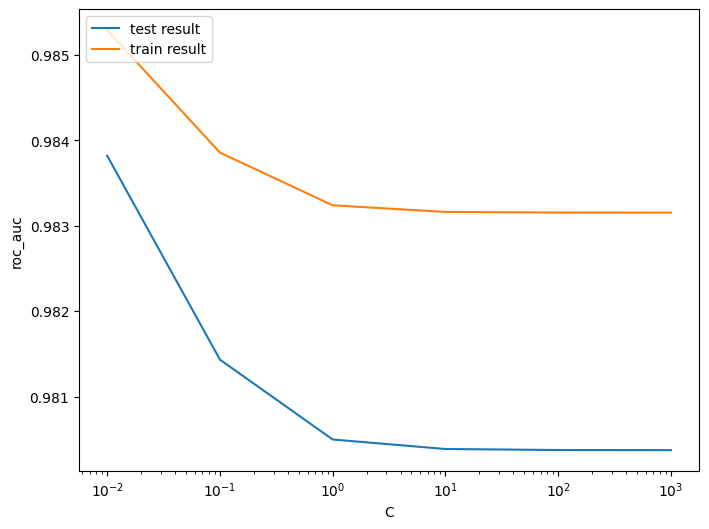

In [42]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [43]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test roc_auc is {0} at C = {1}".format(best_score,
best_C))

 The highest test roc_auc is 0.9838193841631752 at C = 0.01


In [44]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)


In [46]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [48]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


[[227425     24]
 [   135    261]]
Accuracy:- 0.9993021571682503
Sensitivity:- 0.6590909090909091
Specificity:- 0.9998944818398849
F1-Score:- 0.7665198237885463


In [49]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



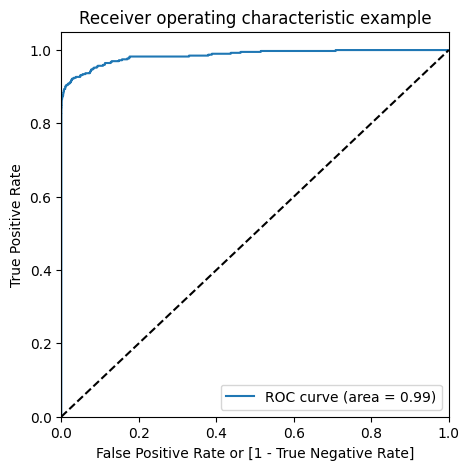

In [50]:
# ROC Curve function
def draw_roc( actual, probs ):
 fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
 drop_intermediate =
False )
 auc_score = metrics.roc_auc_score( actual, probs )
 plt.figure(figsize=(5, 5))
 plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver operating characteristic example')
 plt.legend(loc="lower right")
 plt.show()
 return None
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [51]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# classification_report
print(classification_report(y_test, y_test_pred))

[[56850    16]
 [   42    54]]
Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385543
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



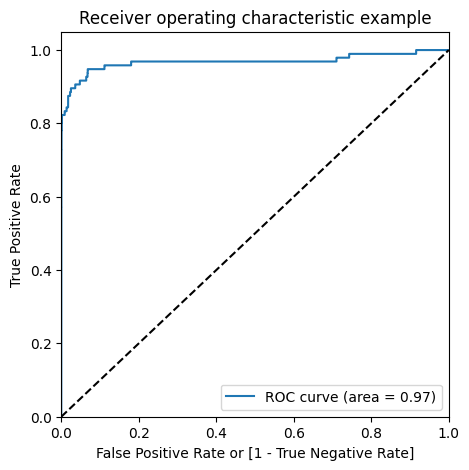

In [52]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model summary
• **Train set**
– Accuracy = 0.99
– Sensitivity = 0.70
– Specificity = 0.99
– F1-Score = 0.76
– ROC = 0.99
•**Test set**
– Accuracy = 0.99
– Sensitivity = 0.77
– Specificity = 0.99
– F1-Score = 0.65
– ROC = 0.97